<a href="https://colab.research.google.com/github/ahmed3520/pattern/blob/main/carr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [ ]:
#from google.colab import files
#files_ = files.upload()
#print(len(files_))

In [ ]:
#load the seol bike data set from drive
train_df=pd.read_csv('cars-train.csv')
test_df=pd.read_csv('cars-test.csv')

print(train_df.head())

   car_id                     car-info     condition  mileage(kilometers)  \
0       0         [(90),(audi),(1986)]  with mileage             319999.0   
1       1     [(rapid),(skoda),(2016)]  with mileage              53000.0   
2       2  [(primera),(nissan),(1992)]  with mileage             350000.0   
3       3      [(combo),(opel),(1997)]  with mileage             299709.0   
4       4     [(zafira),(opel),(2007)]  with mileage             110000.0   

  fuel_type  volume(cm3)   color transmission         drive_unit segment  \
0    PETROL       2200.0    gray    mechanics  front-wheel drive       D   
1    petrol       1600.0    blue    mechanics  front-wheel drive       C   
2    PETROL       2000.0    blue    mechanics  front-wheel drive       D   
3    petrol       1400.0   white    mechanics  front-wheel drive       M   
4    PETROL       1800.0  silver    mechanics  front-wheel drive       M   

   price(USD)  
0         450  
1        9600  
2        1700  
3         205  


In [ ]:
#check for count of missing values in each column.
print(train_df.isna().sum())
test_df.isnull().sum()

car_id                    0
car-info                  0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              35
color                     0
transmission              0
drive_unit             1543
segment                4216
price(USD)                0
dtype: int64


car_id                    0
car-info                  0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              12
color                     0
transmission              0
drive_unit              362
segment                1075
dtype: int64

In [ ]:
train = train_df['car-info'].str.split(',', n=2, expand=True)
train_df = train_df.drop(['car-info'], axis=1)
train_df['category'] =train[0]
train_df['car_name'] =train[1]
train_df['year_production'] = train[2]
train_df['category'] =train_df['category'].str.replace('[()_|;,.<>\{\}\[\]]','')
train_df['car_name'] =train_df['car_name'].str.replace('[()_|;,.<>\{\}\[\]]','')
train_df['year_production'] =train_df['year_production'].str.replace('[()_|;,.<>\{\}\[\]]','')


test = test_df['car-info'].str.split(',', n=2, expand=True)
test_df = test_df.drop(['car-info'], axis=1)
test_df['category'] =test[0]
test_df['car_name'] =test[1]
test_df['year_production'] = test[2]
test_df['category'] =test_df['category'].str.replace('[()_|;,.<>\{\}\[\]]','')
test_df['car_name'] =test_df['car_name'].str.replace('[()_|;,.<>\{\}\[\]]','')
test_df['year_production'] =test_df['year_production'].str.replace('[()_|;,.<>\{\}\[\]]','')
print(train_df.head())

   car_id     condition  mileage(kilometers) fuel_type  volume(cm3)   color  \
0       0  with mileage             319999.0    PETROL       2200.0    gray   
1       1  with mileage              53000.0    petrol       1600.0    blue   
2       2  with mileage             350000.0    PETROL       2000.0    blue   
3       3  with mileage             299709.0    petrol       1400.0   white   
4       4  with mileage             110000.0    PETROL       1800.0  silver   

  transmission         drive_unit segment  price(USD) category car_name  \
0    mechanics  front-wheel drive       D         450       90     audi   
1    mechanics  front-wheel drive       C        9600    rapid    skoda   
2    mechanics  front-wheel drive       D        1700  primera   nissan   
3    mechanics  front-wheel drive       M         205    combo     opel   
4    mechanics  front-wheel drive       M        5300   zafira     opel   

  year_production  
0            1986  
1            2016  
2            1

In [ ]:

train_df['drive_unit'] = train_df['drive_unit'].fillna("None")
test_df['drive_unit'] = test_df['drive_unit'].fillna("None")

train_df['volume(cm3)'] = train_df['volume(cm3)'].fillna(train_df['volume(cm3)'].mean())
test_df['volume(cm3)'] = test_df['volume(cm3)'].fillna(test_df['volume(cm3)'].mean())

train_df['segment'] = train_df['segment'].fillna("None")
#test_df['segment'] = test_df['segment'].fillna(test_df['segment'].value_counts().idxmax())
test_df['segment'] = test_df['segment'].fillna("None")

print(train_df.isna().sum())
test_df.isnull().sum()

car_id                 0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
price(USD)             0
category               0
car_name               0
year_production        0
dtype: int64


car_id                 0
condition              0
mileage(kilometers)    0
fuel_type              0
volume(cm3)            0
color                  0
transmission           0
drive_unit             0
segment                0
category               0
car_name               0
year_production        0
dtype: int64

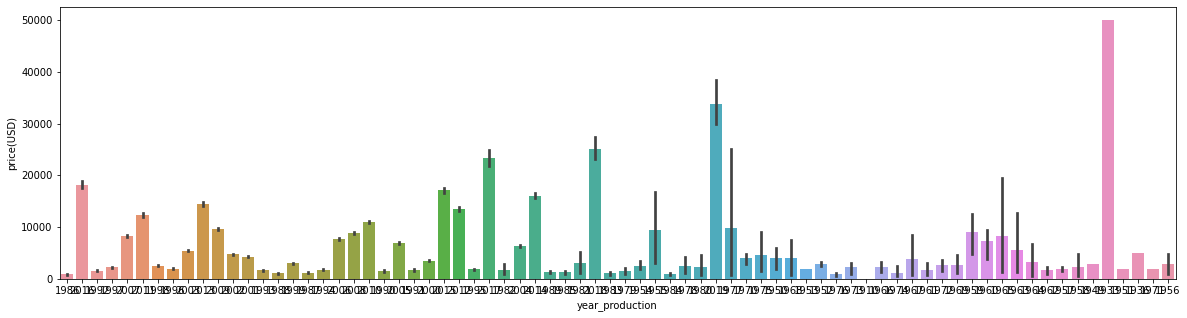

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5),facecolor='w') 
sns.barplot(x = train_df["year_production"], y = train_df["price(USD)"])



In [ ]:
test_df.head()

,car_id,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,category,car_name,year_production
0,0,with mileage,61000.0,PETROL,1500.0,silver,auto,front-wheel drive,B,2,mazda,2009
1,1,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B,2,mazda,2003
2,2,with mileage,97183.0,DIESEL,1400.0,gray,mechanics,front-wheel drive,B,2,mazda,2008
3,3,with mileage,150000.0,PETROL,1300.0,blue,mechanics,front-wheel drive,B,2,mazda,2005
4,4,with mileage,191000.0,DIESEL,1400.0,blue,mechanics,front-wheel drive,B,2,mazda,2003


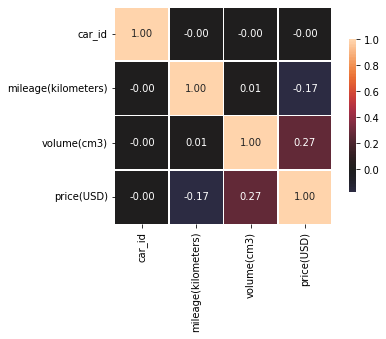

In [ ]:

def correlation_heatmap(train):
    correlations = train.corr()

 
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
 
    
correlation_heatmap(train_df)

In [ ]:
#Getting the shape of dataset with rows and columns
train_y = train_df['price(USD)']
train_data = train_df.drop(['price(USD)'], axis=1)

train_data.head()


,car_id,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment,category,car_name,year_production
0,0,with mileage,319999.0,PETROL,2200.0,gray,mechanics,front-wheel drive,D,90,audi,1986
1,1,with mileage,53000.0,petrol,1600.0,blue,mechanics,front-wheel drive,C,rapid,skoda,2016
2,2,with mileage,350000.0,PETROL,2000.0,blue,mechanics,front-wheel drive,D,primera,nissan,1992
3,3,with mileage,299709.0,petrol,1400.0,white,mechanics,front-wheel drive,M,combo,opel,1997
4,4,with mileage,110000.0,PETROL,1800.0,silver,mechanics,front-wheel drive,M,zafira,opel,2007


In [ ]:
columns = ['condition','year_production','mileage(kilometers)', 'color', 'transmission', 'drive_unit', 'segment', 'category', 'car_name']

In [ ]:
train_id  = train_df['car_id']

train_data =train_df[columns]

test_id  = test_df['car_id']
test_data = test_df[columns]

print(train_data.shape)
print(test_data.shape)

(44995, 9)
(11249, 9)


In [ ]:
train_data.head()

,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,with mileage,1986,319999.0,gray,mechanics,front-wheel drive,D,90,audi
1,with mileage,2016,53000.0,blue,mechanics,front-wheel drive,C,rapid,skoda
2,with mileage,1992,350000.0,blue,mechanics,front-wheel drive,D,primera,nissan
3,with mileage,1997,299709.0,white,mechanics,front-wheel drive,M,combo,opel
4,with mileage,2007,110000.0,silver,mechanics,front-wheel drive,M,zafira,opel


In [ ]:
test_data.head()

,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,with mileage,2009,61000.0,silver,auto,front-wheel drive,B,2,mazda
1,with mileage,2003,265000.0,white,mechanics,front-wheel drive,B,2,mazda
2,with mileage,2008,97183.0,gray,mechanics,front-wheel drive,B,2,mazda
3,with mileage,2005,150000.0,blue,mechanics,front-wheel drive,B,2,mazda
4,with mileage,2003,191000.0,blue,mechanics,front-wheel drive,B,2,mazda


In [ ]:
# get all categorical columns in the dataframe
catCols = [col for col in train_data.columns if train_data[col].dtype=="O"]
print(catCols)
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
  train_data[item] = lb_make.fit_transform(train_data[item])
  test_data[item] = lb_make.fit_transform(test_data[item])

train_data.head()


['condition', 'year_production', 'color', 'transmission', 'drive_unit', 'segment', 'category', 'car_name']


,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,2,40,319999.0,4,1,2,3,140,5
1,2,70,53000.0,1,1,2,2,730,77
2,2,46,350000.0,1,1,2,3,689,58
3,2,51,299709.0,11,1,2,7,300,60
4,2,61,110000.0,10,1,2,7,998,60


In [ ]:
test_data.head()

,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,2,58,61000.0,10,0,2,1,17,44
1,2,52,265000.0,11,1,2,1,17,44
2,2,57,97183.0,4,1,2,1,17,44
3,2,54,150000.0,1,1,2,1,17,44
4,2,52,191000.0,1,1,2,1,17,44



 mu = 7418.56 and sigma = 8337.29



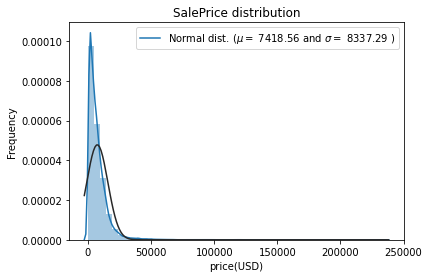

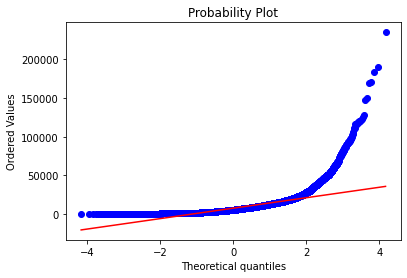

In [ ]:
from scipy.stats import norm, skew #for some statistics

sns.distplot(train_y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_y, plot=plt)
plt.show()




In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#train_y = np.log1p(train_y)

#Check the new distribution 
#sns.distplot(train_y , fit=norm);

# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(train_y)
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
#plt.ylabel('Frequency')
#plt.title('SalePrice distribution')

#Get also the QQ-plot
#fig = plt.figure()
#res = stats.probplot(train_y, plot=plt)
#plt.show()

In [ ]:
test_data.head()


,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,2,58,61000.0,10,0,2,1,17,44
1,2,52,265000.0,11,1,2,1,17,44
2,2,57,97183.0,4,1,2,1,17,44
3,2,54,150000.0,1,1,2,1,17,44
4,2,52,191000.0,1,1,2,1,17,44


In [ ]:
train_data.head()

,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,2,40,319999.0,4,1,2,3,140,5
1,2,70,53000.0,1,1,2,2,730,77
2,2,46,350000.0,1,1,2,3,689,58
3,2,51,299709.0,11,1,2,7,300,60
4,2,61,110000.0,10,1,2,7,998,60


In [ ]:
from scipy.special import boxcox1p

In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
condition,44995.0,1.974931,0.201327,0.0,2.0,2.0,2.0,2.0
year_production,44995.0,57.471719,8.106561,0.0,52.0,58.0,64.0,73.0
mileage(kilometers),44995.0,244097.542648,314019.027014,0.0,137000.0,229000.0,310000.0,9999999.0
color,44995.0,4.932170,4.190175,0.0,1.0,4.0,10.0,12.0
transmission,44995.0,0.642271,0.479337,0.0,0.0,1.0,1.0,1.0
drive_unit,44995.0,2.130214,0.878670,0.0,2.0,2.0,2.0,4.0
segment,44995.0,4.235426,2.285133,0.0,2.0,4.0,6.0,9.0
category,44995.0,471.925369,300.344222,0.0,173.0,451.0,708.0,1000.0


In [ ]:
# get all categorical columns in the dataframe
#train_y =  stats.boxcox(train_y)

catCols = [col for col in train_data.columns if train_data[col].dtype]
print(catCols)


for item in catCols:
  train_data[item] =  boxcox1p(train_data[item],0.30)
  test_data[item] = boxcox1p(test_data[item],0.30)

train_data.head()




['condition', 'year_production', 'mileage(kilometers)', 'color', 'transmission', 'drive_unit', 'segment', 'category', 'car_name']


,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,0.926168,2.673629,9.614836,1.292656,0.613943,0.926168,1.135448,3.469795,1.418460
1,0.926168,3.025784,7.918241,0.613943,0.613943,0.926168,0.926168,4.573386,3.086295
2,0.926168,2.761093,9.704975,0.613943,0.613943,0.926168,1.135448,4.533440,2.906861
3,0.926168,2.825870,9.549300,1.881441,0.613943,0.926168,1.613104,3.970043,2.928255
4,0.926168,2.938693,8.582441,1.824331,0.613943,0.926168,1.613104,4.791400,2.928255


In [ ]:
test_data.head()

,condition,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,0.926168,2.906861,8.043621,1.824331,0.000000,0.926168,0.613943,2.145082,2.733241
1,0.926168,2.838080,9.426962,1.881441,0.613943,0.926168,0.613943,2.145082,2.733241
2,0.926168,2.895893,8.467454,1.292656,0.613943,0.926168,0.613943,2.145082,2.733241
3,0.926168,2.861829,8.874580,0.613943,0.613943,0.926168,0.613943,2.145082,2.733241
4,0.926168,2.838080,9.106493,0.613943,0.613943,0.926168,0.613943,2.145082,2.733241


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_vw_expanded_std = std.fit_transform(train_data)
train_data = pd.DataFrame(data_vw_expanded_std, columns = train_data.columns)
print(train_data.shape)
train_data.head()

(44995, 10)


,condition,fuel_type,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,0.116826,-0.475545,-2.229707,0.590796,0.097989,0.746307,-0.036503,-0.404463,-0.991298,-1.991548
1,0.116826,0.894407,1.390816,-1.032721,-0.837433,0.746307,-0.036503,-0.974973,0.828238,0.868857
2,0.116826,-0.475545,-1.375089,0.692392,-0.837433,0.746307,-0.036503,-0.404463,0.750951,0.461495
3,0.116826,0.894407,-0.723422,0.517959,1.215885,0.746307,-0.036503,1.151041,-0.244995,0.508658
4,0.116826,-0.475545,0.450379,-0.459823,1.093513,0.746307,-0.036503,1.151041,1.266362,0.508658


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_test_expanded_std = std.fit_transform(test_data)
test_data = pd.DataFrame(data_test_expanded_std, columns = test_data.columns)
print(test_data.shape)
test_data.head()

(11249, 10)


,condition,fuel_type,year_production,mileage(kilometers),color,transmission,drive_unit,segment,category,car_name
0,0.122927,-0.477854,0.653935,-0.926864,1.096528,-1.322506,-0.062366,-1.690214,-2.372699,0.314542
1,0.122927,0.059713,0.016047,0.385256,1.219104,0.756140,-0.062366,-1.690214,-2.372699,0.314542
2,0.122927,-2.209175,0.551109,-0.561715,0.099346,0.756140,-0.062366,-1.690214,-2.372699,0.314542
3,0.122927,-0.477854,0.234435,-0.180923,-0.837635,0.756140,-0.062366,-1.690214,-2.372699,0.314542
4,0.122927,-2.209175,0.016047,0.049676,-0.837635,0.756140,-0.062366,-1.690214,-2.372699,0.314542


In [ ]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data,train_y, test_size=0.25, random_state=50)
print(train_data.shape)
print(train_data.head())

(44995, 9)
   condition  year_production  mileage(kilometers)     color  transmission  \
0   0.926168         2.673629             9.614836  1.292656      0.613943   
1   0.926168         3.025784             7.918241  0.613943      0.613943   
2   0.926168         2.761093             9.704975  0.613943      0.613943   
3   0.926168         2.825870             9.549300  1.881441      0.613943   
4   0.926168         2.938693             8.582441  1.824331      0.613943   

   drive_unit   segment  category  car_name  
0    0.926168  1.135448  3.469795  1.418460  
1    0.926168  0.926168  4.573386  3.086295  
2    0.926168  1.135448  4.533440  2.906861  
3    0.926168  1.613104  3.970043  2.928255  
4    0.926168  1.613104  4.791400  2.928255  


In [ ]:

def calculate_rmse(y_prediction, y_true):
    return mean_squared_error(y_prediction, y_true, squared=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost
from sklearn.metrics import mean_squared_error
import lightgbm

In [ ]:
#best model worked for me


lgb_parameters = {'objective': 'regression', 'metric': 'rmse',
                          'num_leaves': 32, 'learning_rate': 0.2, 'subsample': 0.8, 'colsample_bytree': 0.6}
regressor =lightgbm.LGBMRegressor(**lgb_parameters)
regressor.fit(X_train,y_train)
predicitions= regressor.predict(X_test)
print(calculate_rmse(predicitions, y_test))

3150.5572397392298


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression ,ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train,y_train)
predicitions= regressor.predict(X_test)
print(calculate_rmse(predicitions, y_test))

4164.094717336215


In [ ]:
regressor = xgboost.XGBRFRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
predicitions= regressor.predict(X_test)
print(calculate_rmse(predicitions, y_test))

[13:02:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5421.518331491571


In [ ]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
predicitions= regressor.predict(X_test)
print(calculate_rmse(predicitions, y_test))

3721.8498273995237


In [ ]:
from xgboost                          import XGBClassifier
#from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier
from sklearn.ensemble                 import RandomForestClassifier, VotingClassifier
from sklearn.metrics                  import accuracy_score
from sklearn.model_selection          import StratifiedKFold,KFold

In [ ]:
    
def train_mlr(model, X_train, y_train, X_test):
    multi_lr= model()
    multi_lr.fit(X_train, y_train)

    predicitions= multi_lr.predict(X_test)
    return predicitions


In [ ]:
print(y_train)

[15.36023902 16.43418589 17.54239777 ... 10.07542731 17.24664115
 16.03962979]


In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

# Create an instance of the RandomForestClassifier


def calculate_rmse(y_prediction, y_true):
    return mean_squared_error(y_prediction, y_true, squared=False)


#from sklearn.inspection import DecisionBoundaryDisplay

#GB_model =   xgboost.XGBRegressor(learning_rate=0.05)
#GB_model.fit(X_train,y_train)

# Making predictions on train and test data

predicitions= train_mlr(lightgbm.LGBMRegressor, train_data, train_y, test_data)

final= pd.DataFrame({"car_id": test_id, 'price(USD)': predicitions})
final.to_csv('final.csv', index=False)
#print(train_y-predicitions)
#print(calculate_rmse(train_y, predicitions))

# from sklearn.metrics import confusion_matrix

#sns.clustermap(conf_mat)


In [ ]:
X = train_data
Y = train_y
X
predicitions= train_mlr(xgboost.XGBRegressor, X, Y, test_data)

[10:31:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#train_df = train_df['car-info'].str.split(',', n=2, expand=True)


#train_df['category'] =train_df[0]
#train_df['car_name'] =train_df[1]
#train_df['year_production'] = train_df[2]
#train_df['category'] =train_df['category'].str.replace('[()_|;,.<>\{\}\[\]]','')
#train_df['car_name'] =train_df['car_name'].str.replace('[()_|;,.<>\{\}\[\]]','')
#train_df['year_production'] =train_df['year_production'].str.replace('[()_|;,.<>\{\}\[\]]','')

In [ ]:
predicitions.shape

(11249,)

In [ ]:
from sklearn.metrics import mean_squared_error
import math
#X_train, X_test, y_train, y_test
mse=mean_squared_error(y_test,predicitions)
rmse=math.sqrt(mse)
print(rmse)

10008.037828311128


In [ ]:
final= pd.DataFrame({"car_id": test_id, 'prices': y_pred_test})
final.to_csv('final.csv', index=False)

NameError: ignored

In [ ]:
print(test_data.shape)
train_data.head()

In [ ]:
#submission = GB_model.predict(test_data)
len(test_id)

11249

In [ ]:
print(test_id)
df = pd.concat([test_id, pd.Series(predicitions, name="price(USD)")], axis=1)
df  = df.set_index('car_id')
print(df)



0            0
1            1
2            2
3            3
4            4
         ...  
11244    11244
11245    11245
11246    11246
11247    11247
11248    11248
Name: car_id, Length: 11249, dtype: int64
          price(USD)
car_id              
0        3695.713867
1        1291.387817
2        2973.933350
3        1513.610107
4        1149.736450
...              ...
11244   10536.911133
11245    2796.208252
11246    2199.913818
11247    2762.961182
11248    2199.913818

[11249 rows x 1 columns]


In [ ]:
df.to_csv('GradientBoost.csv')
#files.download('GradientBoost.csv')

In [ ]:
import io
import openpyxl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 2)
df["Segmentation"].value_counts().plot.bar(color="Red", ax=ax[0])
df["Segmentation"].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1])
fig.suptitle("Segmentation Frequency After Modeling", fontsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=45)



In [ ]:
df.to_csv('GradientBoost.csv')

In [ ]:
files.download('GradientBoost.csv')